In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('cars_data.csv')
pd.set_option('display.max_columns',None)

## columns detail

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9374 non-null   int64  
 1   Year                   9374 non-null   int64  
 2   Make                   9374 non-null   object 
 3   Model                  9374 non-null   object 
 4   Used/New               9374 non-null   object 
 5   Price                  9374 non-null   object 
 6   ConsumerRating         9374 non-null   float64
 7   ConsumerReviews        9374 non-null   int64  
 8   SellerType             9374 non-null   object 
 9   SellerName             9374 non-null   object 
 10  SellerRating           9374 non-null   float64
 11  SellerReviews          9374 non-null   int64  
 12  StreetName             9374 non-null   object 
 13  State                  9374 non-null   object 
 14  Zipcode                9374 non-null   object 
 15  Deal

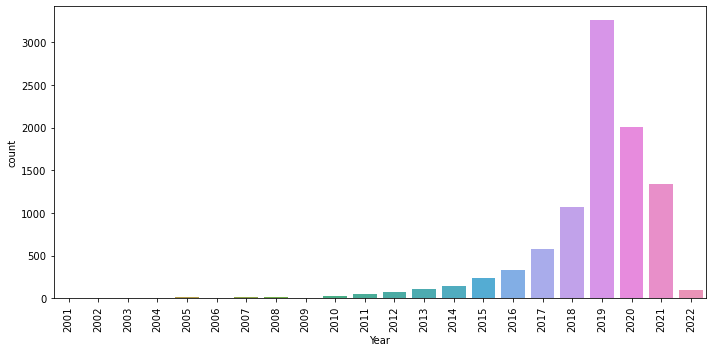

In [5]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Year", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()



* More Cars has been sold in 2019 and then sudden drop in 2020 probably because of covid era 
* Each year there has been continuous growth in sale, it shows people are  preferring car rides more.

<AxesSubplot:>

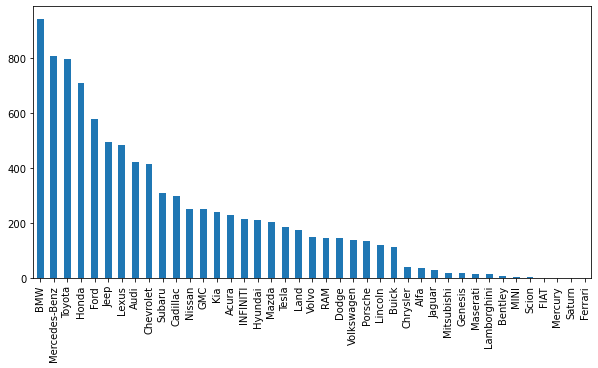

In [6]:
plt.figure(figsize=(10,5))
df.Make.value_counts().plot(kind='bar')

* BMW is having the highest sale followed by Merc,Toyota adn so on.

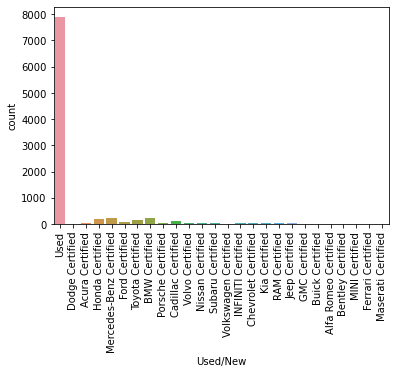

In [51]:
ax = sns.countplot(x='Used/New',data=df)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

* Majority people has chosen used car as there preference.

In [5]:
for i in df:
    if str(df[i].dtype) == 'object':
        print(i,'-------------',len(df[i].unique()))

Make ------------- 41
Model ------------- 1304
Used/New ------------- 26
Price ------------- 5063
SellerType ------------- 2
SellerName ------------- 3969
StreetName ------------- 3965
State ------------- 59
Zipcode ------------- 2163
DealType ------------- 4
ExteriorColor ------------- 949
InteriorColor ------------- 374
Drivetrain ------------- 10
FuelType ------------- 13
Transmission ------------- 93
Engine ------------- 326
VIN ------------- 8470
Stock# ------------- 8428


In [82]:
df.DealType.value_counts()

Good     5521
Great    2406
Fair     1225
Name: DealType, dtype: int64

### Pie plot of SellerType column

([<matplotlib.patches.Wedge at 0x1b19b1504f0>,
 [Text(-1.0999011627020416, 0.014745585329076534, 'Dealer'),
  Text(2.099811312836816, -0.02815049702096079, 'Private')],
 [Text(-0.5999460887465681, 0.008043046543132653, '99.6'),
  Text(1.5998562383518597, -0.02144799773025584, '0.4')])

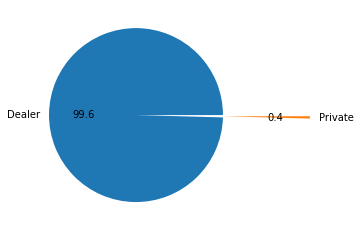

In [52]:
plt.pie(df['SellerType'].value_counts(),autopct="%0.1f",labels=['Dealer','Private'],explode=[0,1])

* 99.6% of people have purchased from dealer, only 0.4% purchased from Private

### Pie plot of DealType column

([<matplotlib.patches.Wedge at 0x1b19b2b2a90>,
 [Text(-0.3506022921212012, 1.042630343294957, 'Good'),
  Text(-0.10556407754494591, -1.094922931320778, 'Great'),
  Text(1.0041716737166049, -0.4490425923063342, 'Fair')],
 [Text(-0.19123761388429153, 0.5687074599790675, '60.3'),
  Text(-0.05758040593360685, -0.5972306898113333, '26.3'),
  Text(0.5477300038454208, -0.24493232307618223, '13.4')])

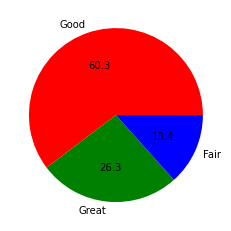

In [53]:
plt.pie(df['DealType'].value_counts(),autopct="%0.1f",labels=['Good','Great','Fair'],colors=['red','green','blue'])

* 60% of people has rated deal as good , followed by great with 26.3% and finally fair with 13.4%

### Count plot and Pie Plot of Drivetrain column

In [96]:
df.Drivetrain.unique()

array(['Front-wheel Drive', 'Four-wheel Drive', 'Rear-wheel Drive',
       'All-wheel Drive', '4WD', 'AWD', 'RWD', 'FWD', 'Front Wheel Drive',
       '–'], dtype=object)

In [22]:
df['Drivetrain'] = df.Drivetrain.replace({'Front-wheel Drive':'FWD','Four-wheel Drive':'4WD',
                      'Rear-wheel Drive':'RWD','All-wheel Drive':'AWD','Front Wheel Drive':'FWD'})

In [56]:
df.Drivetrain.value_counts()

AWD    4508
FWD    2363
4WD    1569
RWD     927
–         7
Name: Drivetrain, dtype: int64

<AxesSubplot:xlabel='Drivetrain', ylabel='count'>

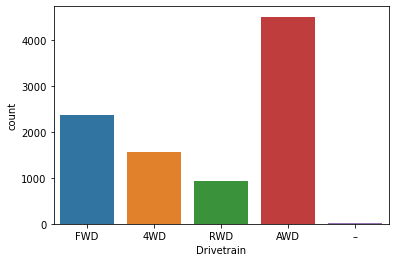

In [57]:
sns.countplot(x='Drivetrain',data=df)

* AWD has around 4200 vehicles followed by FWD with around 2400 vehicle and so on

([<matplotlib.patches.Wedge at 0x1b19b560a30>,
 [Text(0.06594925844487928, 1.098021263596735, 'AWD'),
  Text(-0.8608676375727689, -0.684767778578899, 'FWD'),
  Text(0.44745534881261173, -1.004879948461001, '4WD'),
  Text(1.045751349756582, -0.34118047201193547, 'RWD'),
  Text(1.0999969734620723, -0.002580382584263119, '-')],
 [Text(0.03597232278811597, 0.5989206892345827, '48.1'),
  Text(-0.469564165948783, -0.37350969740667217, '25.2'),
  Text(0.2440665538977882, -0.5481163355241823, '16.7'),
  Text(0.5704098271399538, -0.18609843927923753, '9.9'),
  Text(0.5999983491611303, -0.001407481409598065, '0.1')])

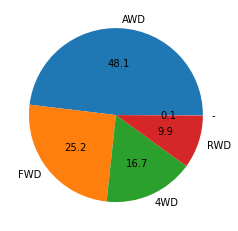

In [58]:
plt.pie(df.Drivetrain.value_counts(),autopct="%0.1f",labels=['AWD','FWD','4WD','RWD','-'])

* In terms of percentage, AWD contributes 48.1% of data, followed by FWD with 25.2% of data and so on

### Analyzing Price column with Histogram

In [6]:
df['Price'] = df.Price.str.replace("$",'')
df['Price'] = df.Price.str.replace(",",'')

In [7]:
df.Price.dtype

dtype('O')

In [8]:
df['Price'] = df.Price.astype('int64')

In [9]:
import plotly.express as px
px.histogram(df,x = 'Price')

* The data is skewed as we have Some pricey cars as well in the dataset
* The median of this column seems to be in between 34k-35.999k.

### Analyzing ConsumerRating column with histogram

<AxesSubplot:xlabel='ConsumerRating', ylabel='Density'>

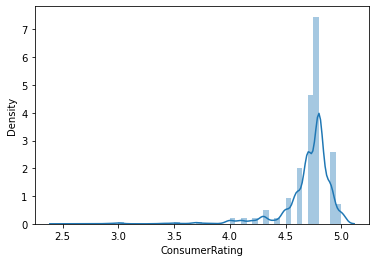

In [66]:
sns.distplot(df['ConsumerRating'])

* People have voted majorirly around 4.7

### Creating dataset on the basis of DriveTrain column

In [23]:
train_awd = df[df.Drivetrain == 'AWD']
train_fwd = df[df.Drivetrain == 'FWD']
train_4wd = df[df.Drivetrain == '4WD']
train_rwd =df[df.Drivetrain == 'RWD']

### lets create three datasets one the basis of DealType column

In [24]:
deal_good = df[df.DealType == 'Good']
deal_great = df[df.DealType == 'Great']
deal_fair = df[df.DealType == 'Fair']

### Analyzing Price column on the basis of deal type

<AxesSubplot:xlabel='Price', ylabel='Density'>

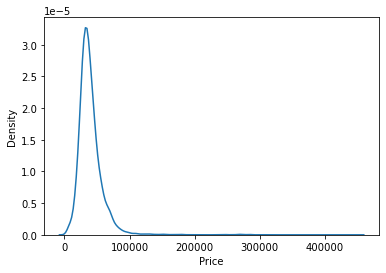

In [13]:
sns.distplot(df.Price,hist=False,)

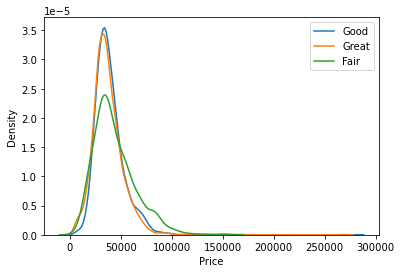

In [14]:
sns.distplot(deal_good.Price,hist=False,label='Good')
sns.distplot(deal_great.Price,hist=False,label='Great')
sns.distplot(deal_fair.Price,hist=False,label='Fair')
plt.legend()

* The Behaviour of Price is exactly same for all the three different deals

In [ ]:
sns.relplot(x='Price',data=df,kind=)

### Analyzing Price column on the basis of DriveTrain

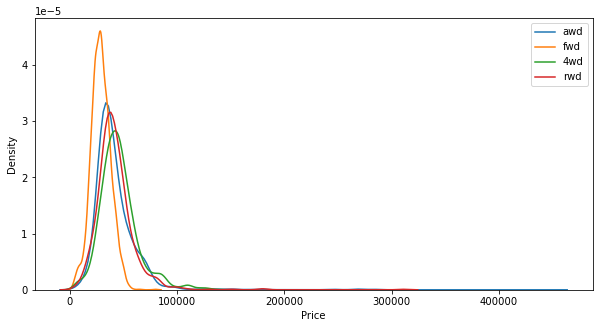

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(train_awd.Price,hist=False,label='awd')
sns.distplot(train_fwd.Price,hist=False,label='fwd')
sns.distplot(train_4wd.Price,hist=False,label='4wd')
sns.distplot(train_rwd.Price,hist=False,label='rwd')
plt.legend()

* The front wheel drive has the cheapest cost among all the rest
* The all wheel drive is skewed towards right indicating there is some highly priced cars that uses awd as it drive mode.

<AxesSubplot:xlabel='Mileage'>

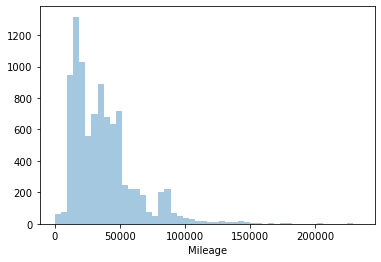

In [16]:
sns.distplot(df['Mileage'],kde=False)

### Analyzing Mileage on the basis of DealType

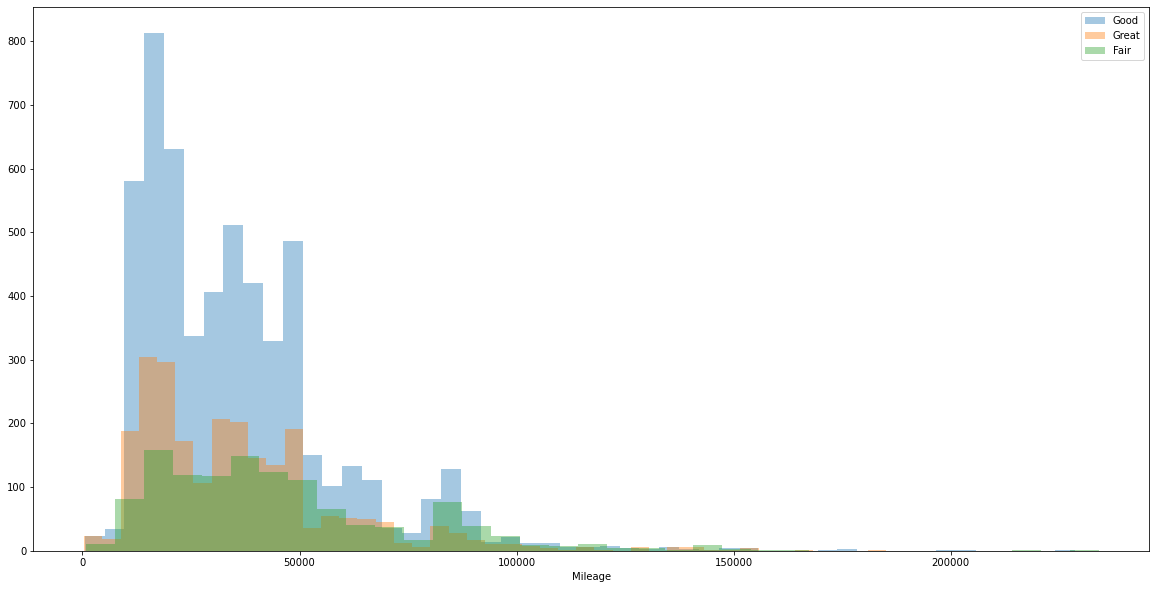

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(deal_good['Mileage'],kde=False,label='Good')
sns.distplot(deal_great['Mileage'],kde=False,label='Great')
sns.distplot(deal_fair['Mileage'],kde=False,label='Fair')
plt.legend()

* The Fair deal type is having more even spreading in terms of mileage.
* The Good Deal type is having majority of spread in between 0-50000 mmiles, then there are few cars which has been considered as a good deal but has driven more than 200000 miles

### Analyzing Mileage column on the basis of DriveTrain

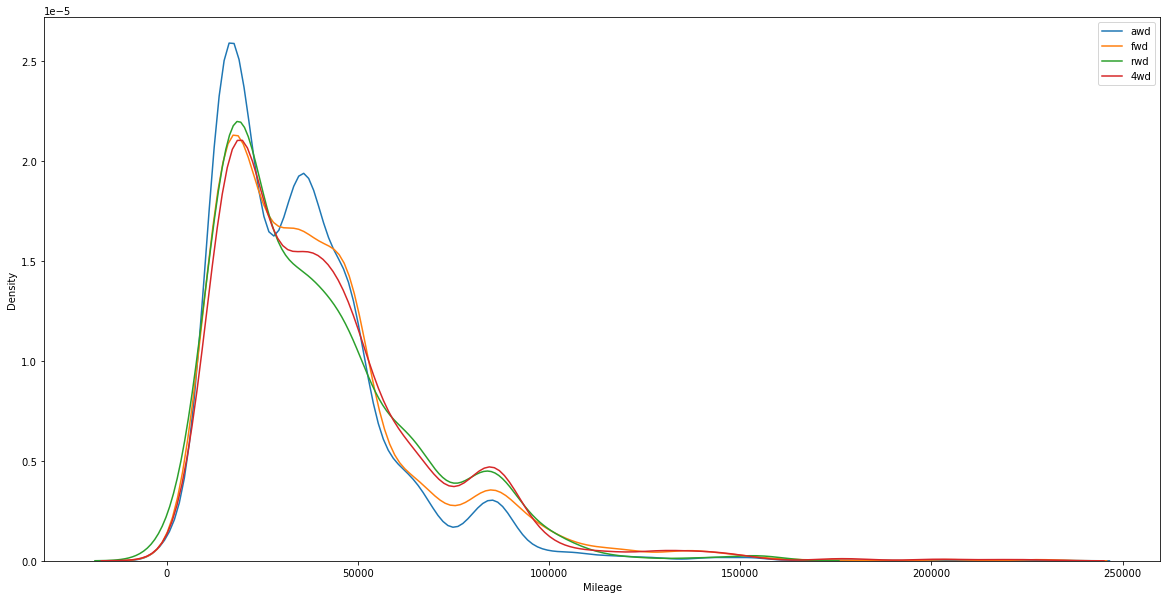

In [26]:
plt.figure(figsize=(20,10))
sns.distplot(train_awd['Mileage'],hist=False,label='awd')
sns.distplot(train_fwd['Mileage'],hist=False,label='fwd')
sns.distplot(train_rwd['Mileage'],hist=False,label='rwd')
sns.distplot(train_4wd['Mileage'],hist=False,label='4wd')
plt.legend()

* AWD has the highest number of less driven cars among all the 4 DriveTrain.
* No distinctive pattern has been found in terms of Mileage and Drive Train

### Numerical - Numerical -- Scatterplot

<AxesSubplot:xlabel='ComfortRating', ylabel='Price'>

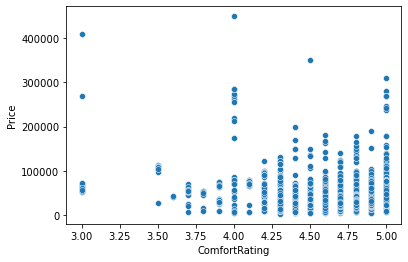

In [19]:
sns.scatterplot(x='ComfortRating',y='Price',data=df)

* The more the comfort, the more the price

<AxesSubplot:xlabel='ComfortRating', ylabel='Price'>

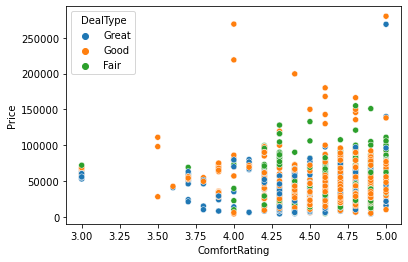

In [34]:
sns.scatterplot(x='ComfortRating',y='Price',data=df,hue='DealType')

* High Comfort rating has more good DealType

<AxesSubplot:xlabel='ComfortRating', ylabel='Price'>

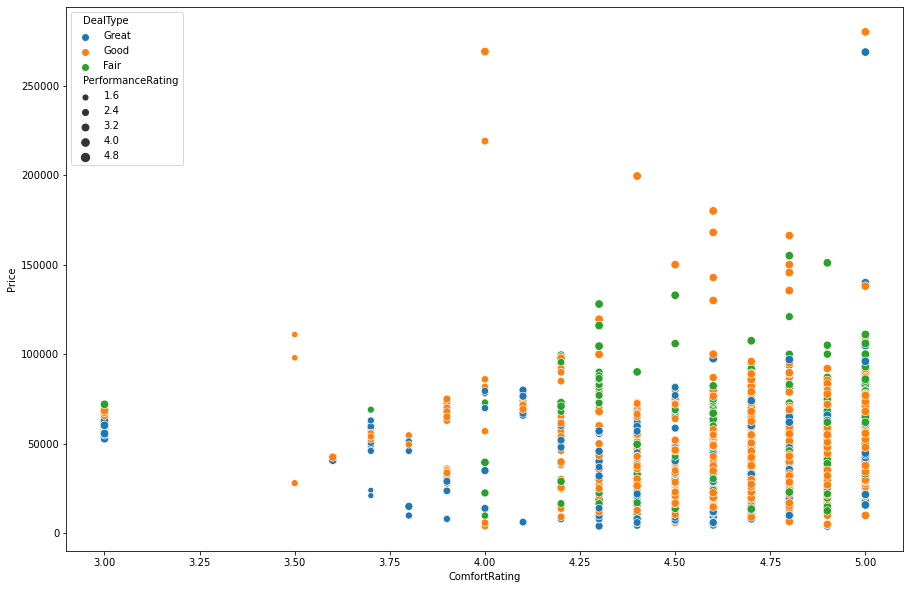

In [109]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='ComfortRating',y='Price',data=df,hue='DealType',size='PerformanceRating')

* Performace of the car has got nothing to do with the comfortability

## Numerical - Numerical -- Jointplot

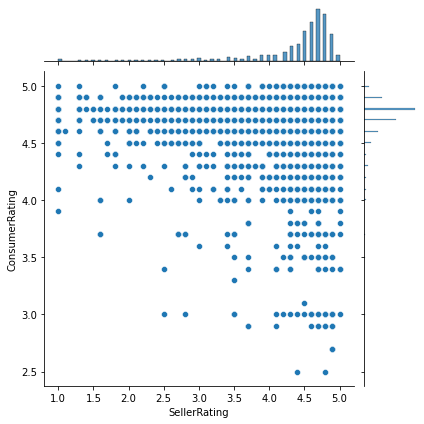

In [43]:
sns.jointplot(x='SellerRating',y='ConsumerRating',data=df)

* There are very few instance where seller has rated low and cosumer has rated low as well and vice versa, The rating from both are on the higher side only.
* This is evident as well with the above plotted histogram

### Numerical - Categorical-- Barplot

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 0 to 9373
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9374 non-null   int64  
 1   Year                   9374 non-null   int64  
 2   Make                   9374 non-null   object 
 3   Model                  9374 non-null   object 
 4   Used/New               9374 non-null   object 
 5   Price                  9374 non-null   int64  
 6   ConsumerRating         9374 non-null   float64
 7   ConsumerReviews        9374 non-null   int64  
 8   SellerType             9374 non-null   object 
 9   SellerName             9374 non-null   object 
 10  SellerRating           9374 non-null   float64
 11  SellerReviews          9374 non-null   int64  
 12  StreetName             9374 non-null   object 
 13  State                  9374 non-null   object 
 14  Zipcode                9374 non-null   object 
 15  Deal

<AxesSubplot:xlabel='Drivetrain', ylabel='Price'>

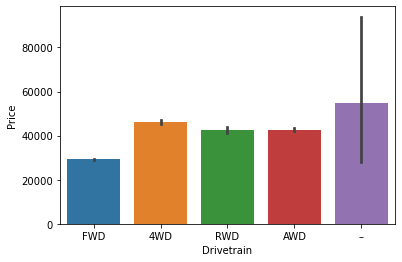

In [27]:
sns.barplot(x='Drivetrain',y='Price',data=df)

<AxesSubplot:xlabel='SellerType', ylabel='Price'>

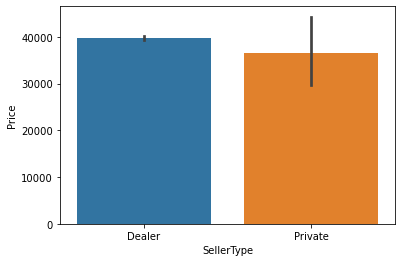

In [38]:
sns.barplot(x='SellerType',y='Price',data=df)

<AxesSubplot:xlabel='Drivetrain', ylabel='Price'>

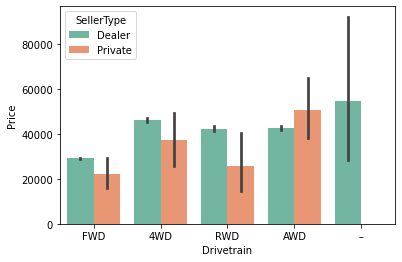

In [39]:
sns.barplot(x='Drivetrain',y='Price',data=df,hue='SellerType',palette='Set2')

* The Black line indicates error bars while estimating the value
* In all the driving modes, the dealer always have a high amount of price/margin as compared Private, but in case of AWD, Private has the average price higher than the Dealer

### Numerical - Categorical -- Boxplot

In [110]:
df.FuelType.unique()

array(['Gasoline', 'Gasoline Fuel', 'Electric Fuel System',
       'E85 Flex Fuel', 'Electric', 'Hybrid', 'Plug-In Electric/Gas', '–',
       'Flex Fuel Capability', 'Diesel', 'Diesel Fuel',
       'Gasoline/Mild Electric Hybrid', 'Flexible Fuel'], dtype=object)

In [28]:
## Assuming,hence converting
df['FuelType'] = df.FuelType.replace({'Gasoline Fuel':'Gasoline','Electric Fuel System':'Electric',
                   'Diesel Fuel':'Diesel','Plug-In Electric/Gas': 'Hybrid',
                    'E85 Flex Fuel':'FFV','Flex Fuel Capability':'FFV','Flexible Fuel':'FFV'})

In [29]:
import plotly.express as px
fig = px.box(df,x= 'FuelType', y='Price')
fig.show()

* Electric vehicles are the one which is more costly on average compared to different engines
* Gasoline engine seems to have certain high performance vehicle whose cost is extremely high

In [30]:
import plotly.express as px
fig = px.box(df,x= 'FuelType', y='Price',color='SellerType')
fig.show()

* Private selling Electric Cars have wider range of price as compared to dealer except for the fact, there are some over pricey and cheap cars available at the Dealer as well.
* Dealer selling Gasoline Engine ha swider variety and has some of the most expensive cars as well with them, On the other hand Private has only limited range of Gasoline engine available
* Diesel Gasoline/Mild Electric Hybrid category has very less number of cars altogether

### Categorical - Numerical - Countplot

<AxesSubplot:xlabel='FuelType', ylabel='count'>

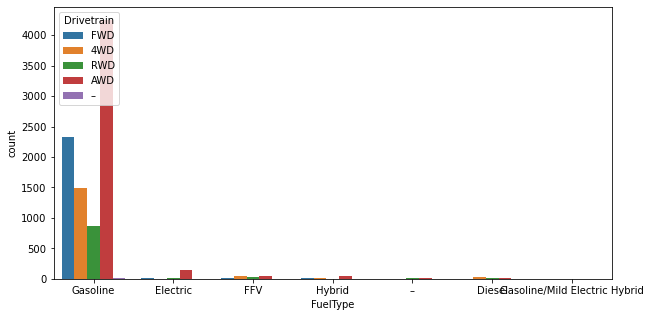

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(x='FuelType',data=df,hue='Drivetrain')

* More vehicles of Gasoline Engine
* Awd dominates is Gasoline segment
* Electric vehicles also majorly manufactures cars with AWD

### Breaking the dataset into two parts on the Basis of SellerType column

In [39]:
st_dealer = df[df.SellerType == 'Dealer']
st_private = df[df.SellerType == 'Private']

<AxesSubplot:title={'center':'Private'}, xlabel='FuelType', ylabel='count'>

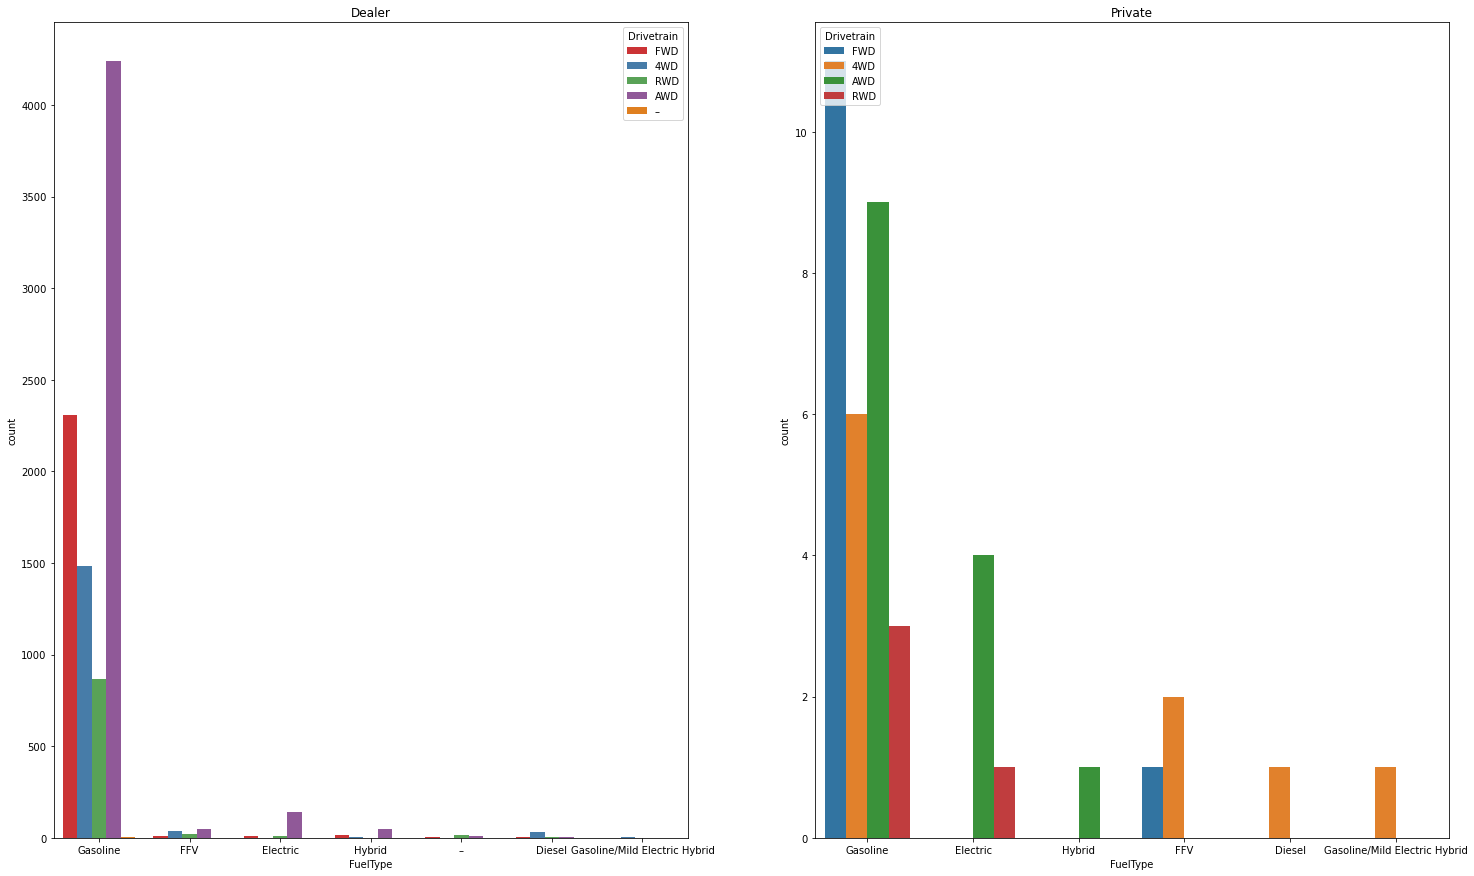

In [41]:
plt.figure(figsize=(25,15))
plt.subplot(1,2,1)
plt.title('Dealer')
sns.countplot(x='FuelType',data=st_dealer,hue='Drivetrain',palette='Set1')
plt.subplot(1,2,2)
plt.title('Private')
sns.countplot(x='FuelType',data=st_private,hue='Drivetrain')

* Front wheel drive is dominating with Gasoline fuel in Private DealType whereas All wheel drive is dominating with Gasoline fuel in Dealer DealType 
* In Private , for Electric category, only all wheel drive and rear wheel drive type of cars are available
* In Private, for Diesel and Gasoline/Mild Electric Hybrid, only 4wD cars are available 

## Categorical - Categorical -- HeatMap

<AxesSubplot:xlabel='Transmission', ylabel='Make'>

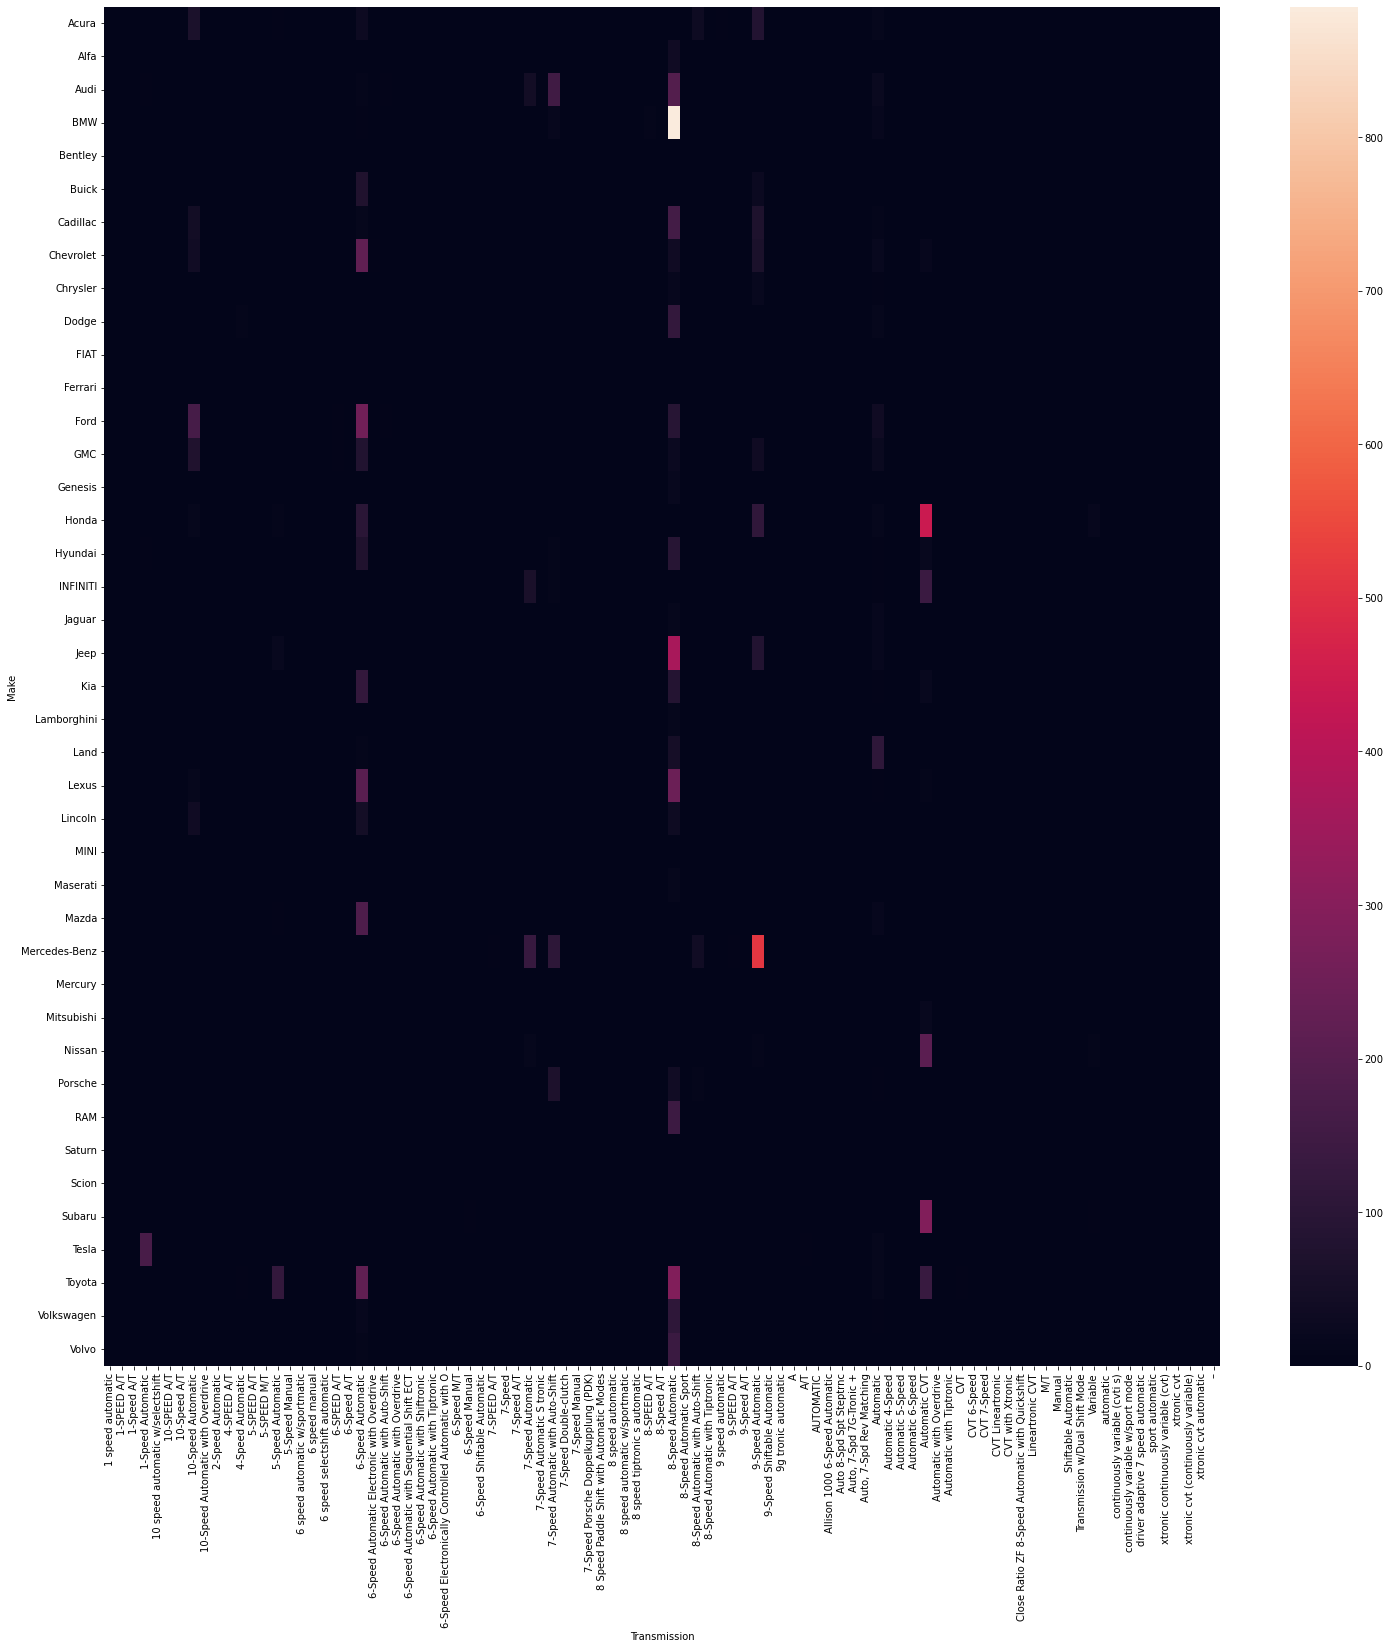

In [51]:
plt.figure(figsize=(25,25))
sns.heatmap(pd.crosstab(df.Make,df['Transmission']))

<Figure size 1800x1800 with 0 Axes>

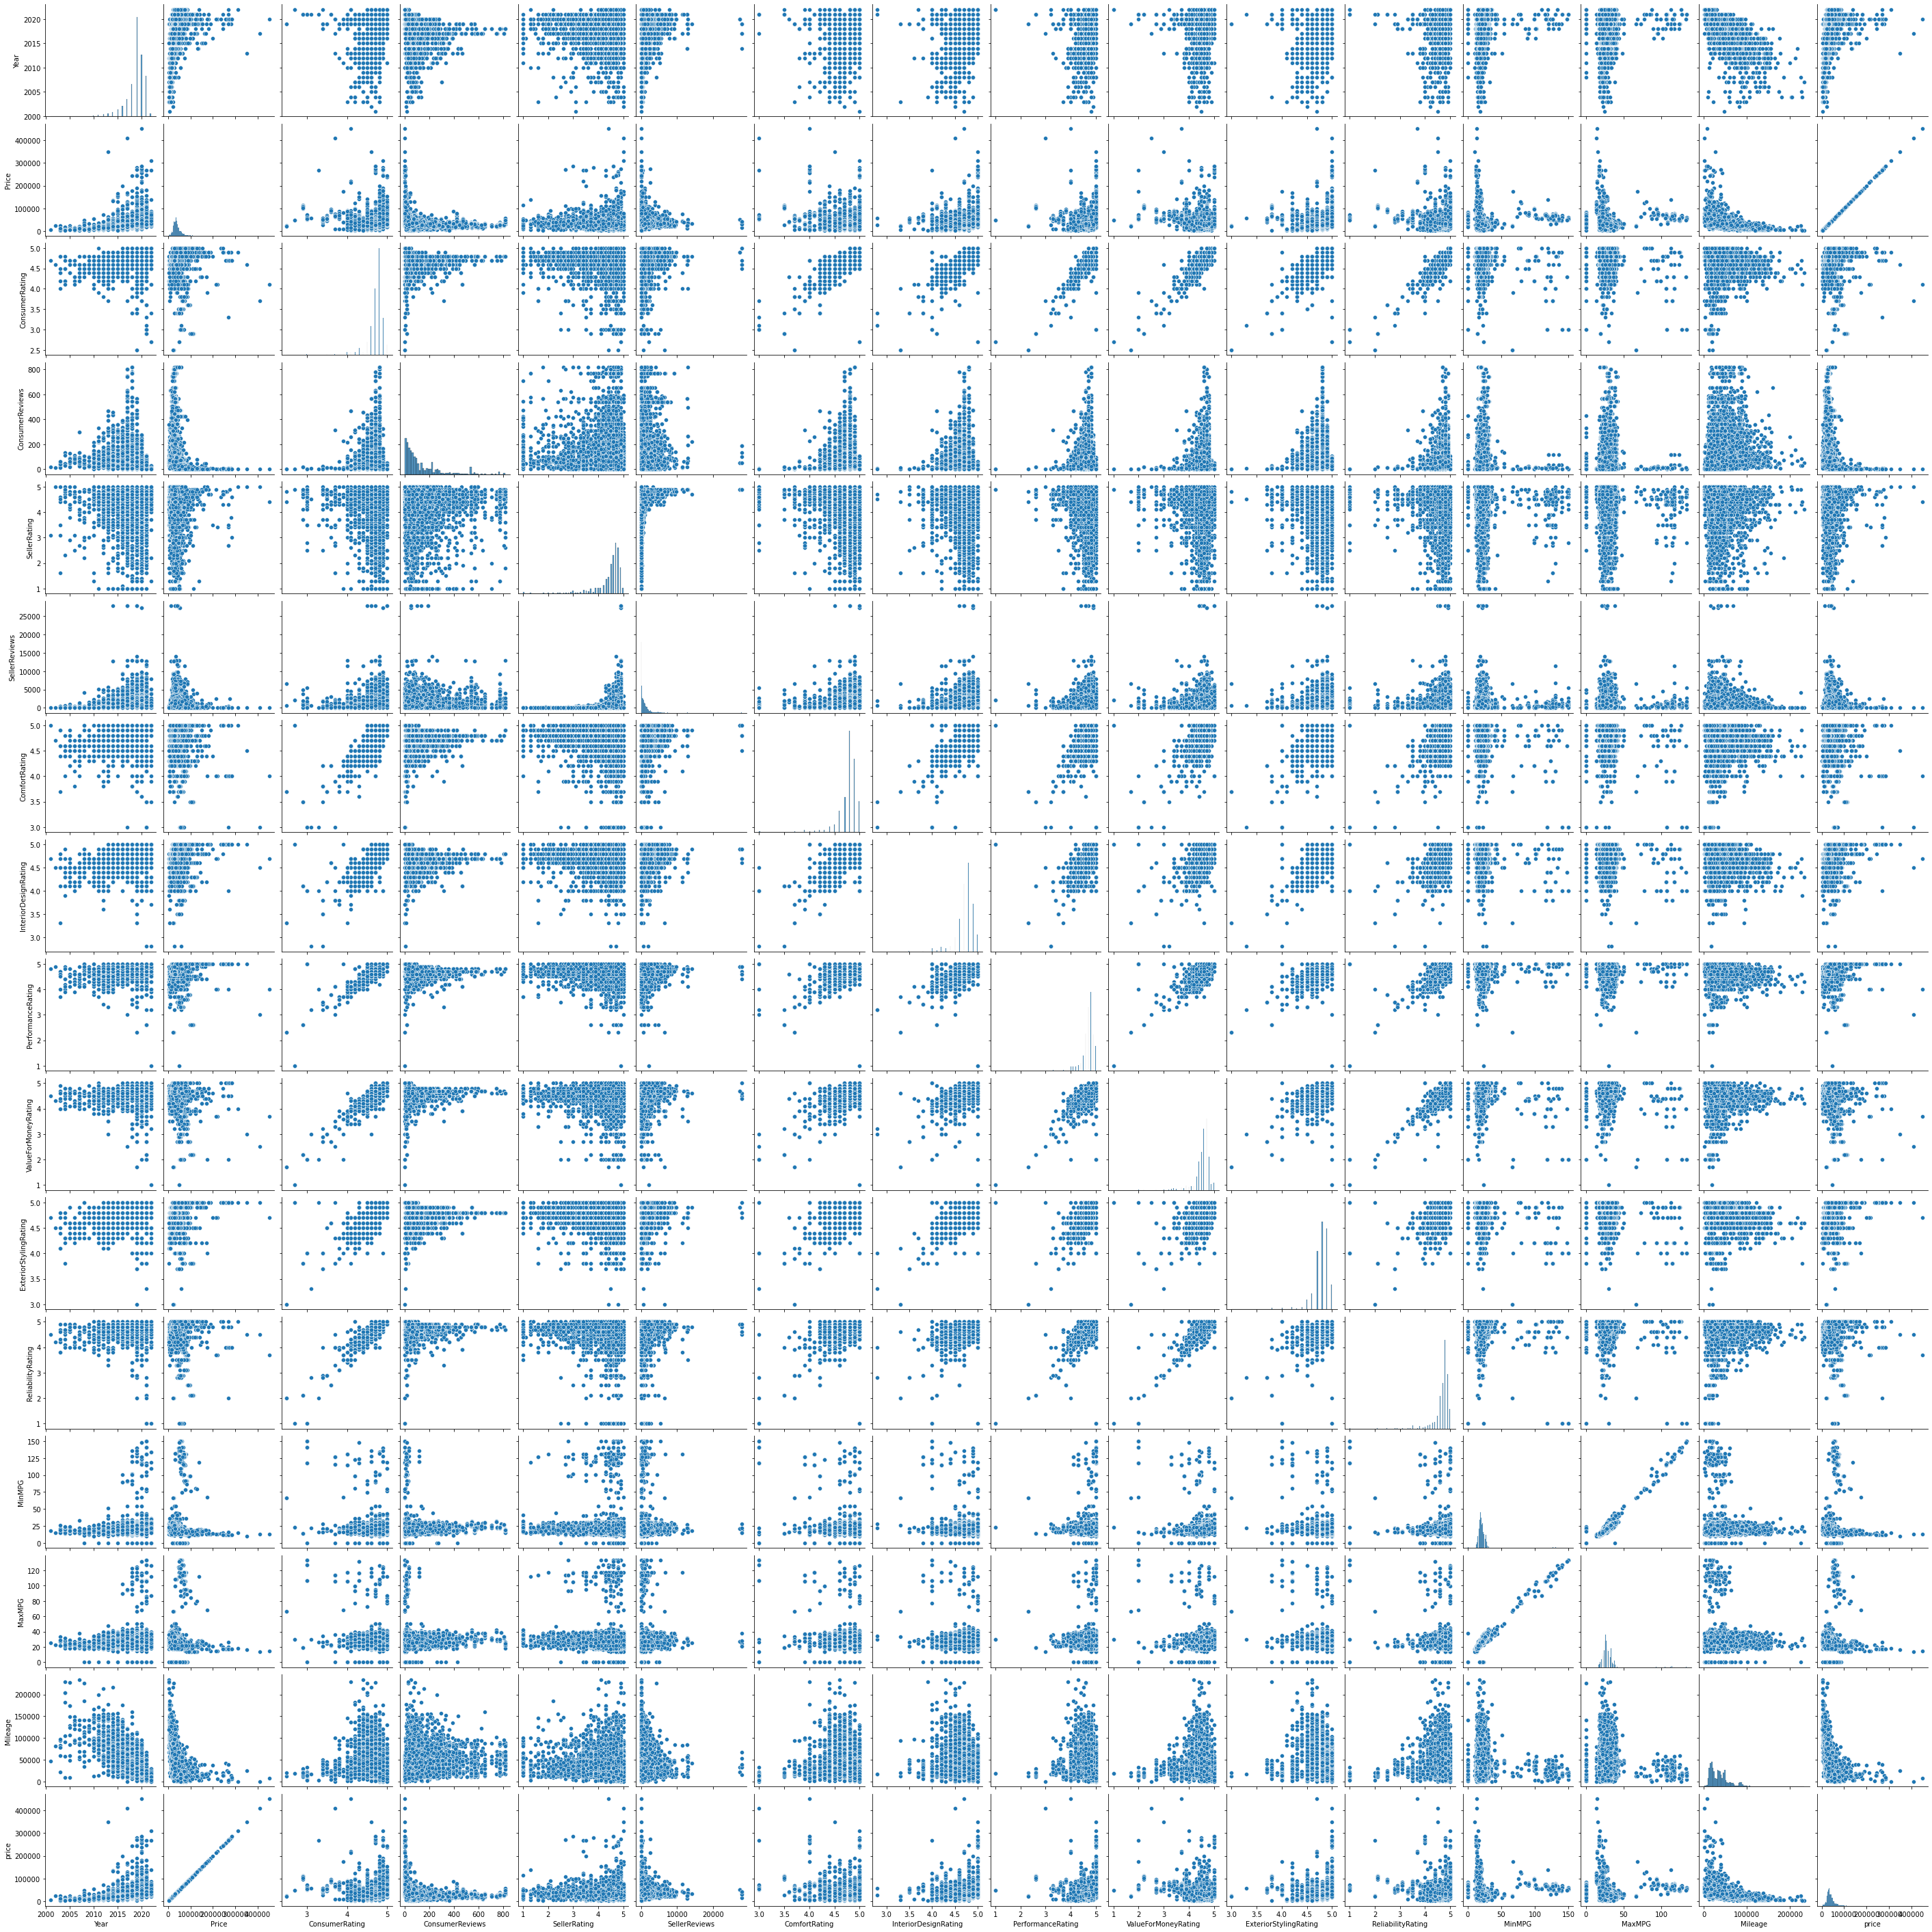

In [210]:
plt.figure(figsize=(25,25))
sns.pairplot(df)